In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#set display parameter
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
#import the new World Happiness Report with happiness level

path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_with_happylevel.csv'
df= pd.read_csv(os.path.join(path), index_col = False)

### Data Cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year', 'happy_level'],
      dtype='object')

In [9]:
#drop unnecessary column 
Dropcolumns = ['Unnamed: 0']

df = df.drop(columns=Dropcolumns)

In [11]:
df.shape

(1230, 11)

### Create Subsets by Happiness Level

- Very happy
- Happy
- Ok

In [14]:
#count values
df['happy_level'].value_counts()

Happy         504
Ok            414
Very Happy    312
Name: happy_level, dtype: int64

In [16]:
#very happy
df_veryhappy= df.loc[df['happy_level'] == 'Very Happy']
#happy
df_happy= df.loc[df['happy_level'] == 'Happy']
#ok
df_ok= df.loc[df['happy_level'] == 'Ok']

### Create Correlation Heat Map

#### Very Happy

In [18]:
#drop unnecessary columns
Dropcolumns2 = ['Country'
                           ,'Region'
                           ,'Happiness Rank'
                            ,'Year'
                            ,'happy_level']

df_veryhappy = df_veryhappy.drop(columns=Dropcolumns2)

In [19]:
df_veryhappy.head()

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


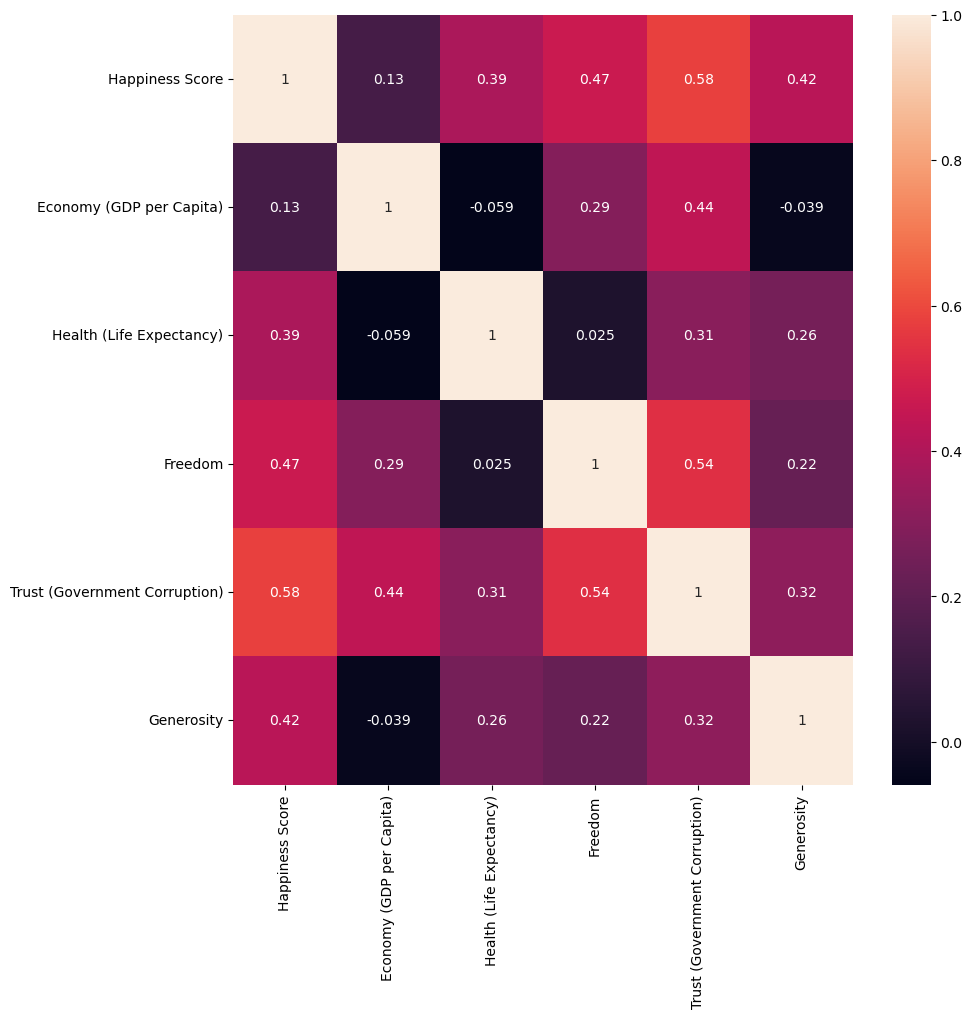

In [20]:
#Create correlation heatmap 
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_veryhappy.corr(), annot=True, ax=ax)

# Save the plot as an image file (e.g., PNG)
fig = corr.get_figure()
fig.savefig('correlation_heatmap_veryhappy.png', bbox_inches='tight')